### Data Source : https://www.kaggle.com/datasets/rajatsurana979/fast-food-sales-report

In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('Balaji Fast Food Sales.csv')

In [16]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [27]:
df.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

In [28]:
missing_values = df.isna().sum()
print(missing_values)

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64


In [21]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
#save
df.to_csv('Balaji Fast Food Sales.csv', index=False)

In [22]:
df = df.sort_values(by='date', ascending=True)

In [23]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,2022-04-01,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Evening
622,623,2022-04-02,Cold coffee,Beverages,40,15,600,Cash,Mr.,Midnight
571,572,2022-04-02,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon
519,520,2022-04-03,Panipuri,Fastfood,20,11,220,Online,Mrs.,Night
412,413,2022-04-03,Aalopuri,Fastfood,20,10,200,Online,Mrs.,Midnight


## Handle missing values

In [31]:
transaction_type_counts = df['transaction_type'].value_counts()
print(transaction_type_counts)

Cash      476
Online    417
Name: transaction_type, dtype: int64


In [24]:
transaction_type_mapping = {'Cash': 0, 'Online': 1}

# Use the map() method to convert 'transaction_type' to numerical values
df['transaction_type'] = df['transaction_type'].map(transaction_type_mapping)

# Calculate the mean of the 'transaction_type' column
mean_transaction_type = df['transaction_type'].mean()

# Round the mean to a specific number of decimal places (e.g., 2 decimal places)
rounded_mean_transaction_type = round(mean_transaction_type, 2)

# Print the rounded mean value
print("Rounded Mean of 'transaction_type' column:", rounded_mean_transaction_type)

Rounded Mean of 'transaction_type' column: 0.47


# Fill Mean in Missing Values

In [25]:
# Calculate the mean of the 'transaction_type' column
mean_transaction_type = df['transaction_type'].mean()

# Fill missing values in 'transaction_type' with the mean
df['transaction_type'].fillna(mean_transaction_type, inplace=True)

# Save the updated DataFrame 
df.to_csv('Balaji_Fast_Food_Sales_Updated.csv', index=False)


# Evaluate Impact 

In [26]:
# the original CSV file 
original_df = pd.read_csv('Balaji Fast Food Sales.csv')

# Define a mapping for 'transaction_type' to numerical values
transaction_type_mapping = {'Cash': 0, 'Online': 1}

# Use the map() method to convert 'transaction_type' to numerical values
original_df['transaction_type'] = original_df['transaction_type'].map(transaction_type_mapping)

# Calculate the original mean of the 'transaction_type' column
original_mean_transaction_type = original_df['transaction_type'].mean()

# Read the updated CSV file with missing values filled+rounded mean
df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated.csv')

# Calculate the new mean of the 'transaction_type' column
new_mean_transaction_type = df1['transaction_type'].mean()

# Compare the original and new means
print("Original Mean:", original_mean_transaction_type)
print("New Mean:", new_mean_transaction_type)

Original Mean: 0.4669652855543113
New Mean: 0.4669652855543108


### Not much of an impact to the dataframe 

In [27]:
df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated.csv')

# Round the 'transaction_type' column to the nearest integer (0 or 1)
df1['transaction_type'] = df1['transaction_type'].round().astype(int)

# Save the updated
df1.to_csv('Balaji_Fast_Food_Sales_Updated1.csv', index=False)


In [28]:
# Convert numerical values back to categorical using the inverse mapping
inverse_transaction_type_mapping = {v: k for k, v in transaction_type_mapping.items()}
df1['transaction_type'] = df1['transaction_type'].map(inverse_transaction_type_mapping)
# Save the updated
df1.to_csv('Balaji_Fast_Food_Sales_Updated1.csv', index=False)


In [29]:
missing_values = df1.isna().sum()
print(missing_values)

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64


In [38]:
df1.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [21]:
item_type_count = df1['item_type'].value_counts()
item_type_count

Fastfood     686
Beverages    314
Name: item_type, dtype: int64

In [22]:
time_of_sale_count = df1['time_of_sale'].value_counts()
time_of_sale_count

Afternoon    205
Night        205
Evening      201
Midnight     199
Morning      190
Name: time_of_sale, dtype: int64

In [22]:
item_name_count = df1['item_name'].value_counts()
item_name_count

Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: item_name, dtype: int64

In [30]:
# Rename the 'received_by' column to 'gender'
df1 = df1.rename(columns={'received_by': 'staffgender'})

# Save the updated 
df1.to_csv('Balaji_Fast_Food_Sales_Updated1.csv', index=False)

In [31]:
df1.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,staffgender,time_of_sale
0,691,2022-04-01,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Evening
1,623,2022-04-02,Cold coffee,Beverages,40,15,600,Cash,Mr.,Midnight
2,572,2022-04-02,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon
3,520,2022-04-03,Panipuri,Fastfood,20,11,220,Online,Mrs.,Night
4,413,2022-04-03,Aalopuri,Fastfood,20,10,200,Online,Mrs.,Midnight


In [23]:
staffgender = df1['staffgender'].value_counts()
staffgender

Mr.     512
Mrs.    488
Name: staffgender, dtype: int64

## Analyzing sales trends over time

In [19]:
 pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


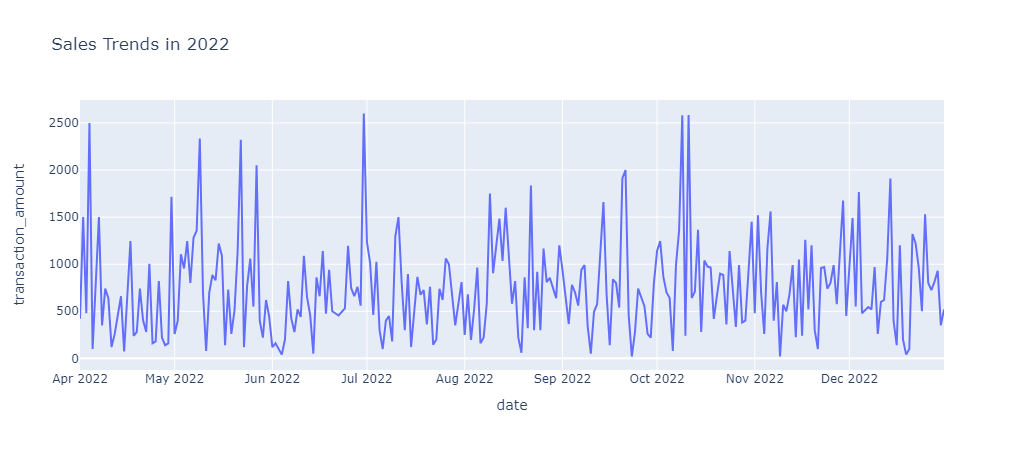

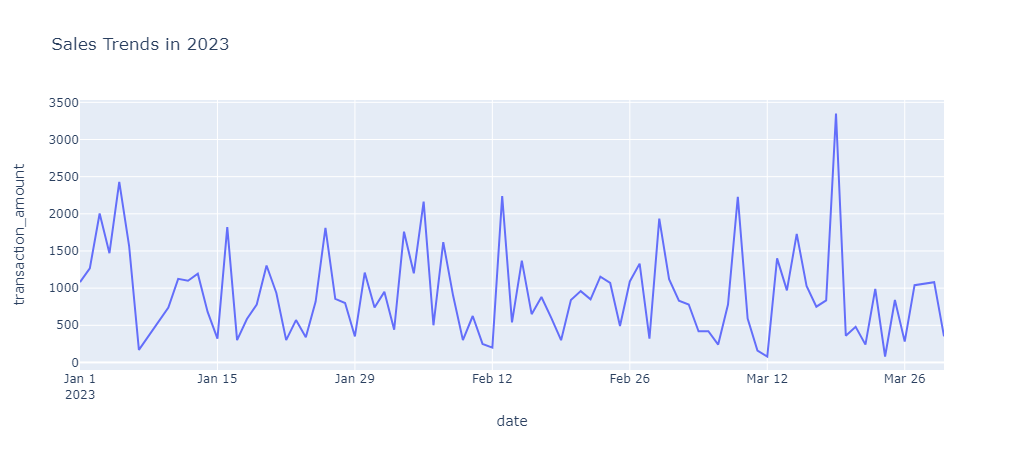

In [34]:
import plotly.express as px

df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')
df1['date'] = pd.to_datetime(df1['date'])

# Filter data for the year 2022
sales_2022 = df1[df1['date'].dt.year == 2022]

# Filter data for the year 2023
sales_2023 = df1[df1['date'].dt.year == 2023]

# Group the data for each year by the 'date' column to aggregate sales over time
sales_by_date_2022 = sales_2022.groupby('date')['transaction_amount'].sum().reset_index()
sales_by_date_2023 = sales_2023.groupby('date')['transaction_amount'].sum().reset_index()

# Create interactive line charts for each year using Plotly
fig_2022 = px.line(sales_by_date_2022, x='date', y='transaction_amount', title='Sales Trends in 2022')
fig_2023 = px.line(sales_by_date_2023, x='date', y='transaction_amount', title='Sales Trends in 2023')

fig_2022.show()
fig_2023.show()

# Show the interactive charts (opens in a web browser)

fig_2022.write_html('sales_trends_2022.html')
fig_2023.write_html('sales_trends_2023.html')

## Understanding customer preferences for different items

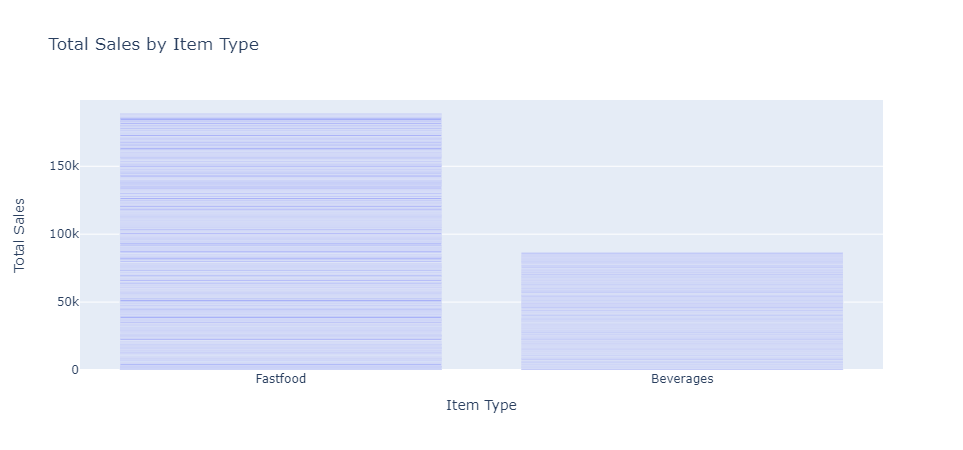

In [39]:
df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')

# Sales by Item Type
fig_sales_by_item_type = px.bar(df1, x='item_type', y='transaction_amount', title='Total Sales by Item Type')
fig_sales_by_item_type.update_xaxes(title='Item Type')
fig_sales_by_item_type.update_yaxes(title='Total Sales')
fig_sales_by_item_type.show()


## Understanding customer preferences for different items.

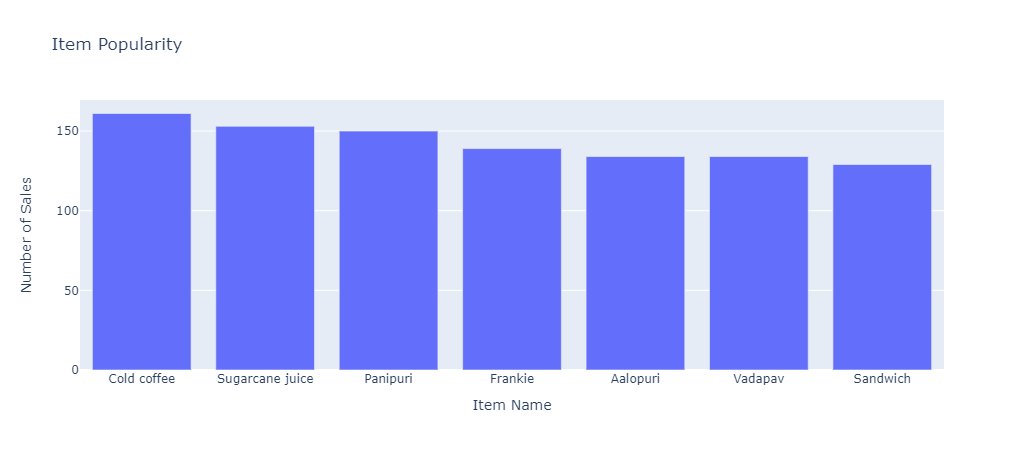

In [34]:
import pandas as pd
import plotly.express as px

df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')

item_popularity = df1['item_name'].value_counts().reset_index()
item_popularity.columns = ['item_name','transaction_amount']
fig_item_popularity = px.bar(item_popularity, x='item_name', y='transaction_amount', title='Item Popularity')
fig_item_popularity.update_xaxes(title='Item Name')
fig_item_popularity.update_yaxes(title='Number of Sales')
fig_item_popularity.show()

## Understanding customer preferences by time of Sale

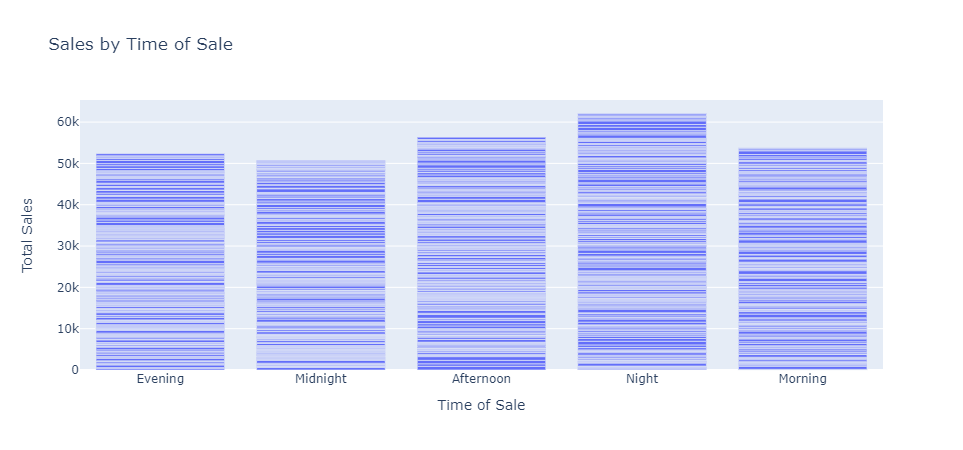

In [41]:
import pandas as pd
import plotly.express as px

df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')

# Create a bar chart to analyze sales by the time of sale
fig_time_of_sale = px.bar(
    df1, x='time_of_sale', y='transaction_amount', 
    title='Sales by Time of Sale'
)

fig_time_of_sale.update_xaxes(title='Time of Sale')
fig_time_of_sale.update_yaxes(title='Total Sales')
fig_time_of_sale.show()


## Understanding customer preferences by time of Sale

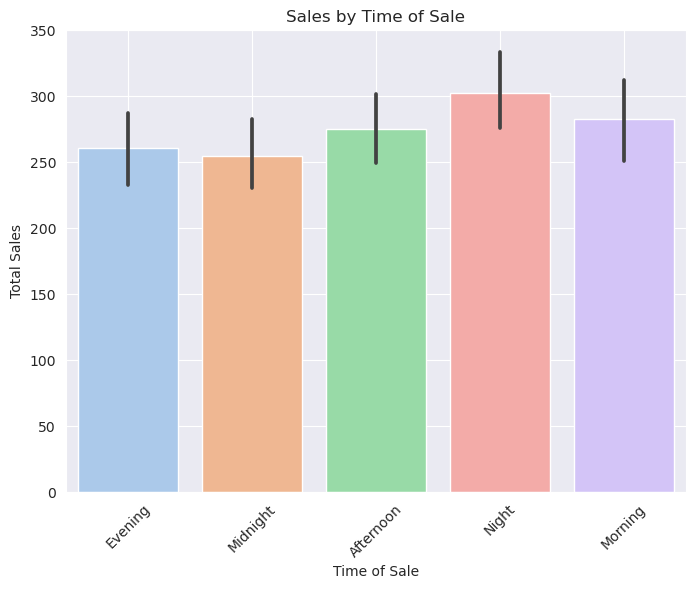

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')
sns.set_style("darkgrid")

# Define a pastel color palette 
pastel_palette = sns.color_palette("pastel")

# Create a bar chart 
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='time_of_sale', y='transaction_amount', palette=pastel_palette)
plt.title('Sales by Time of Sale')
plt.xlabel('Time of Sale')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


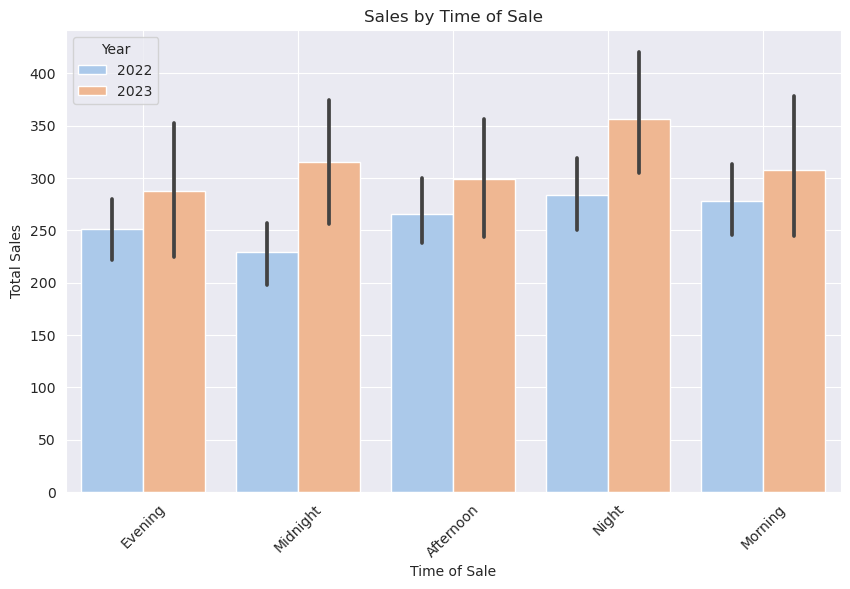

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read your data into a DataFrame
df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')

# Convert the 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Extract the year from the 'date' column
df1['year'] = df1['date'].dt.year

# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Create a bar chart for each year
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='time_of_sale', y='transaction_amount', hue='year', palette=pastel_palette)
plt.title('Sales by Time of Sale')
plt.xlabel('Time of Sale')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year')
plt.show()


## Item Type Distribution

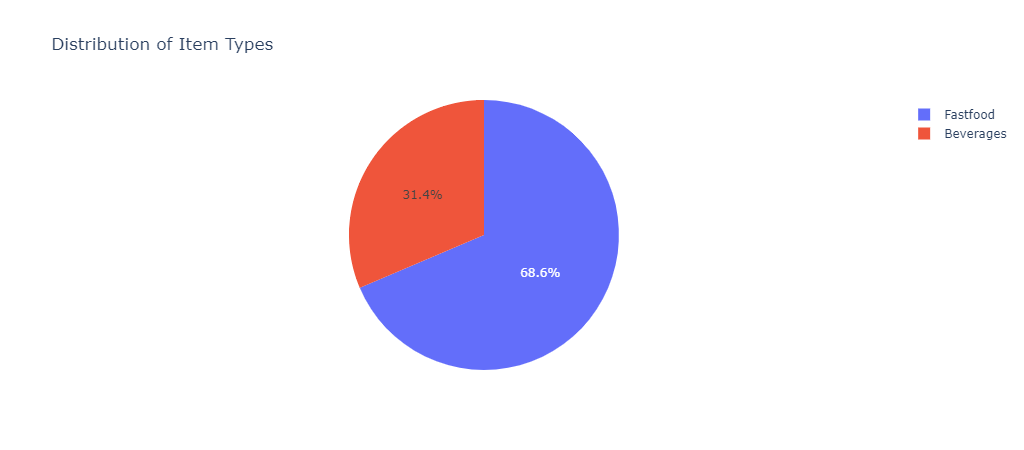

In [45]:
# Item Type Distribution
fig_item_type_distribution = px.pie(df1, names='item_type', title='Distribution of Item Types')
fig_item_type_distribution.show()

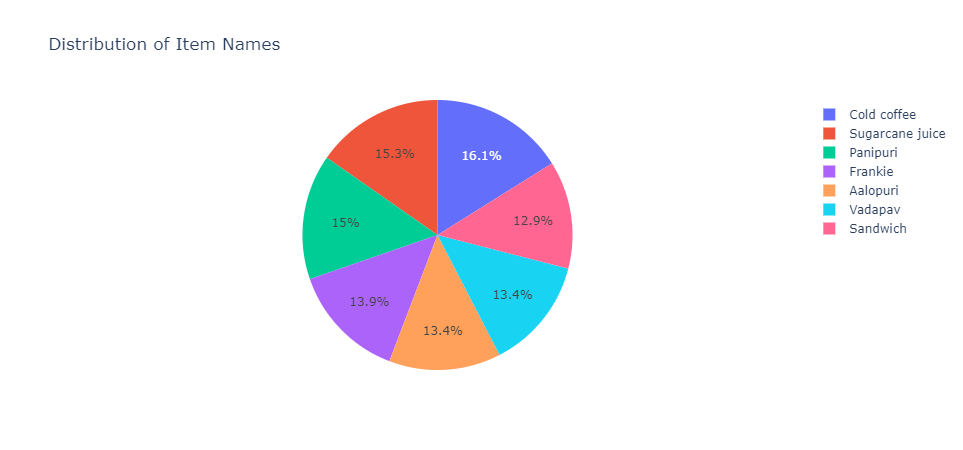

In [18]:
fig_item_type_distribution = px.pie(df1, names='item_name', title='Distribution of Item Names')
fig_item_type_distribution.show()

## Evaluating the impact of payment methods on revenue.

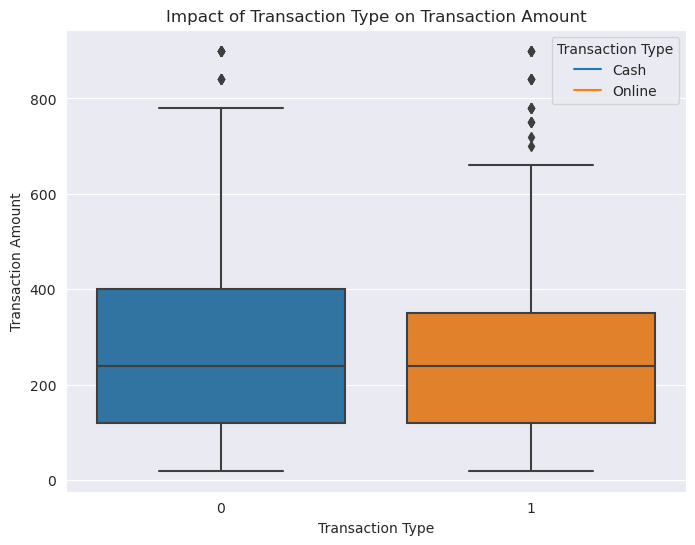

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read your data into a DataFrame
df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')

# Create a box plot to evaluate the impact of 'transaction_type' on 'transaction_amount'
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df1, x='transaction_type', y='transaction_amount')
plt.title('Impact of Transaction Type on Transaction Amount')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')

# Create custom legend handles and labels
legend_handles = [plt.Line2D([0], [0], color=sns.color_palette()[0], label='Cash'),
                  plt.Line2D([0], [0], color=sns.color_palette()[1], label='Online')]

# Add the legend to the plot
ax.legend(handles=legend_handles, title='Transaction Type')

plt.show()


### Prefer cash over Online

## Exploring the popularity of items at different times of the day

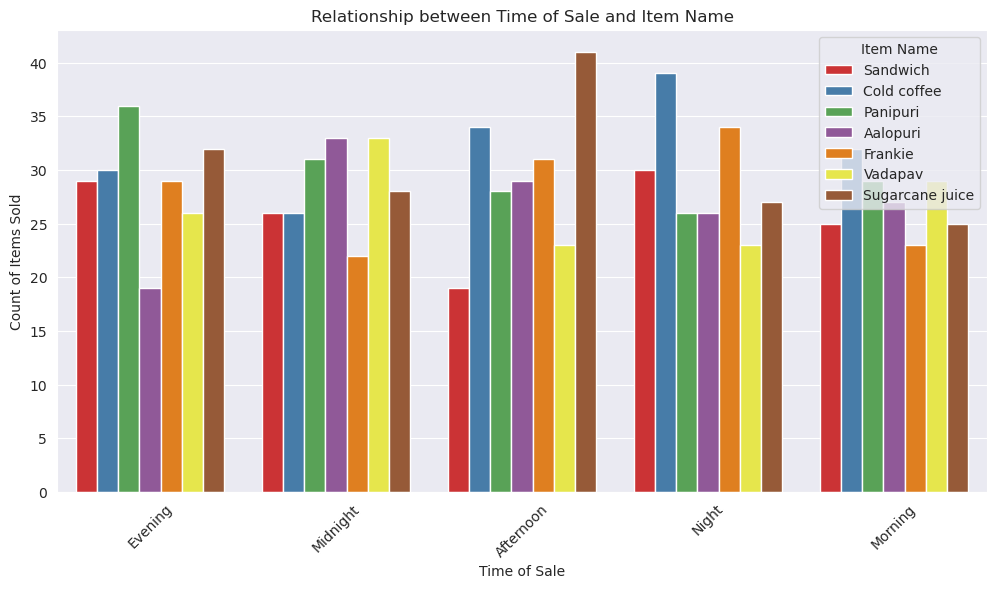

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')

# Create a clustered bar chart to show the relationship between 'time_of_sale' and 'item_name'
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='time_of_sale', hue='item_name', palette='Set1')
plt.title('Relationship between Time of Sale and Item Name')
plt.xlabel('Time of Sale')
plt.ylabel('Count of Items Sold')
plt.xticks(rotation=45) 
plt.legend(title='Item Name')
plt.show()


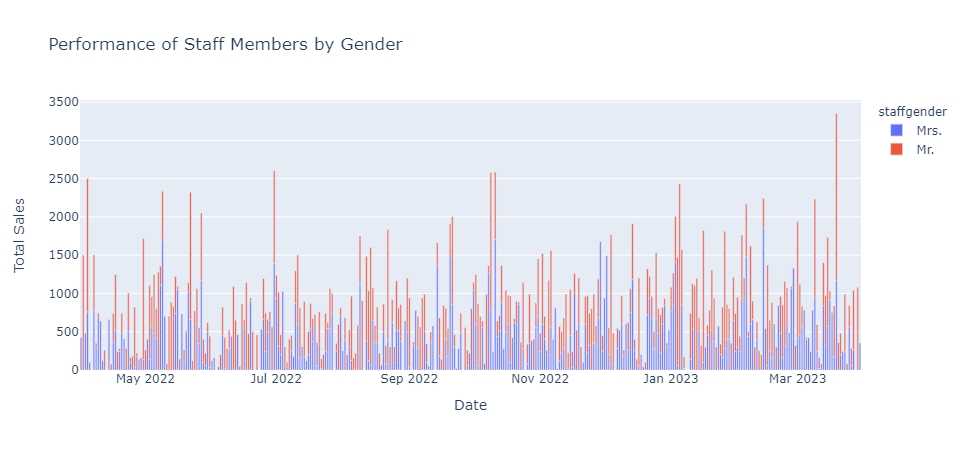

In [21]:
import pandas as pd
import plotly.express as px
df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')

# Convert the 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Group the data by 'date' and 'staffgender' and calculate the sum of transaction amounts
sales_by_date_gender = df1.groupby(['date', 'staffgender'])['transaction_amount'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(sales_by_date_gender, x='date', y='transaction_amount', color='staffgender',
              title='Performance of Staff Members by Gender')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total Sales')
fig.show()


### Male's performance better than female

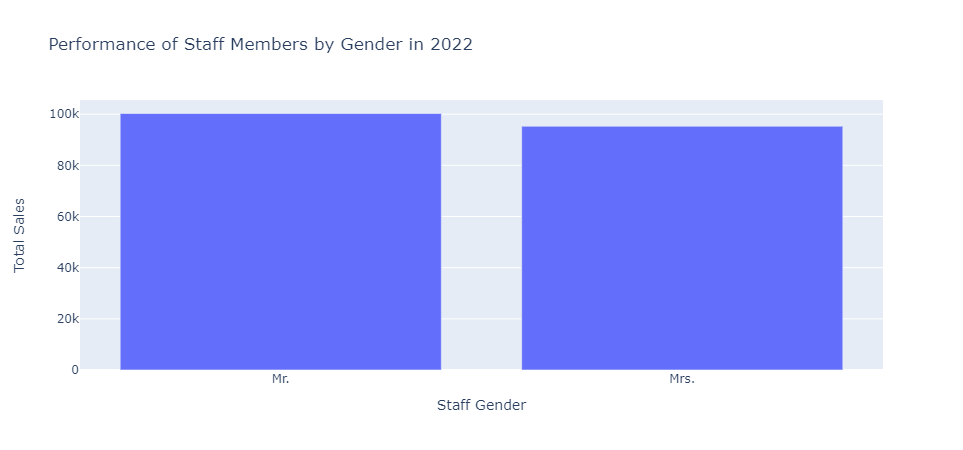

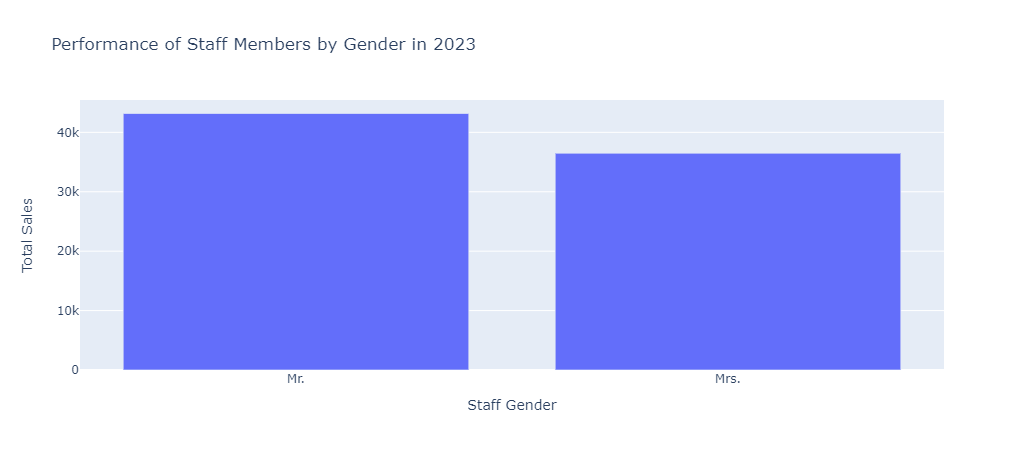

In [22]:
import pandas as pd
import plotly.express as px

df1 = pd.read_csv('Balaji_Fast_Food_Sales_Updated1.csv')

# Convert the 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Extract the year from the 'date' column
df1['year'] = df1['date'].dt.year

# Group the data by 'year', 'staffgender' and calculate the sum of transaction amounts
sales_by_year_gender = df1.groupby(['year', 'staffgender'])['transaction_amount'].sum().reset_index()

# Create an interactive bar chart using Plotly for each year
fig_2022 = px.bar(sales_by_year_gender[sales_by_year_gender['year'] == 2022], x='staffgender', y='transaction_amount',
                  title='Performance of Staff Members by Gender in 2022')
fig_2022.update_xaxes(title='Staff Gender')
fig_2022.update_yaxes(title='Total Sales')

fig_2023 = px.bar(sales_by_year_gender[sales_by_year_gender['year'] == 2023], x='staffgender', y='transaction_amount',
                  title='Performance of Staff Members by Gender in 2023')
fig_2023.update_xaxes(title='Staff Gender')
fig_2023.update_yaxes(title='Total Sales')

fig_2022.show()
fig_2023.show()


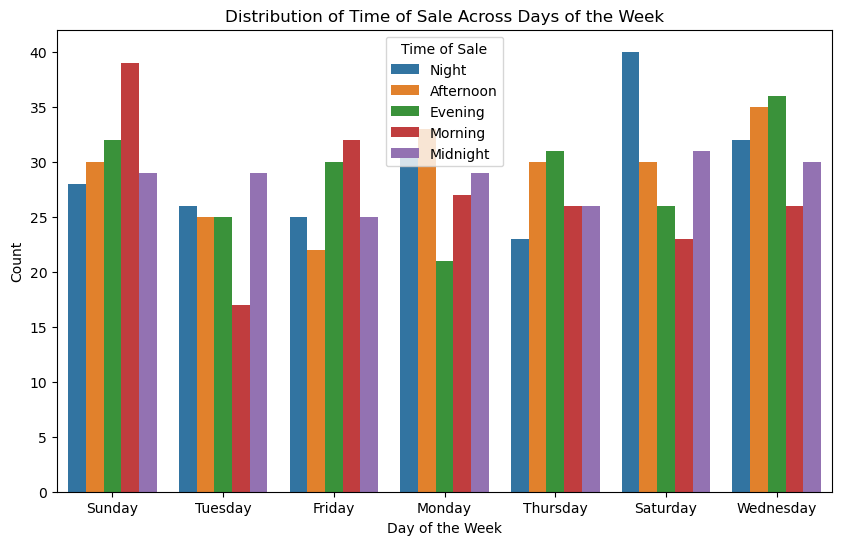

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'date' to datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# Check if 'date' is a datetime type
if pd.api.types.is_datetime64_any_dtype(df1['date']):
    # Extract day of the week
    df1['day_of_week'] = df1['date'].dt.day_name()

    # Create a DataFrame with day of the week and encoded time_of_sale
    day_of_week_df = pd.DataFrame({'day_of_week': df1['day_of_week'], 'time_of_sale': df1['time_of_sale']})

    # Plot the distribution using a bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x='day_of_week', hue='time_of_sale', data=day_of_week_df)
    plt.xlabel('Day of the Week')
    plt.ylabel('Count')
    plt.title('Distribution of Time of Sale Across Days of the Week')
    plt.legend(title='Time of Sale')
    plt.show()
else:
    print("The 'date' column is not of datetime type.")
